# I STEP

# Data Cleaning

In [1]:
import pandas as pd
df_data_1 = pd.read_csv("mainSimulationAccessTraces.csv")

# Missing Value

In [2]:
import numpy as np
df_data_1['accessedNodeType'] = df_data_1['accessedNodeType'].fillna(value='/Malicious')

# Unexpected Values

In [3]:
df_data_1.loc[df_data_1.value=='twenty',"value"] = '20.0'
df_data_1.loc[df_data_1.value=='false',"value"] = '0'
df_data_1.loc[df_data_1.value=='true',"value"] = '1'
df_data_1.loc[df_data_1.value=='none',"value"] = '0'
df_data_1.loc[df_data_1.value=='0',"value"] = '0.0'
df_data_1['value'] = df_data_1['value'].fillna(value='60.0')
df_data_1 = df_data_1.drop(df_data_1.index[df_data_1.value.str.contains("org.*")])
df_data_1.value = df_data_1.value.astype(float)

# Unexpected Values

In [4]:
df_data_1.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0,1520031603464,normal


# Frequency Distribution Visualization

In [5]:
import matplotlib.pyplot as plt
import random
import numpy as np

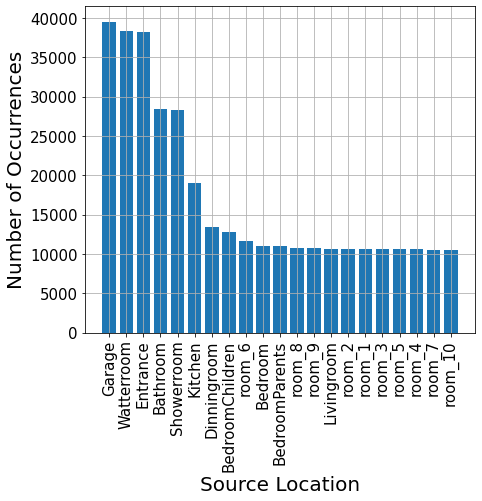

In [6]:
source_loc_count = df_data_1.sourceLocation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.bar(source_loc_count.index, source_loc_count.values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Location', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
for i,j in zip(source_loc_count.index,source_loc_count.values):
    print(i,j)

Garage 39499
Watterroom 38368
Entrance 38217
Bathroom 28461
Showerroom 28315
Kitchen 18962
Dinningroom 13429
BedroomChildren 12836
room_6 11642
Bedroom 11009
BedroomParents 10946
room_8 10798
room_9 10752
Livingroom 10620
room_2 10606
room_1 10601
room_3 10597
room_5 10596
room_4 10572
room_7 10558
room_10 10557


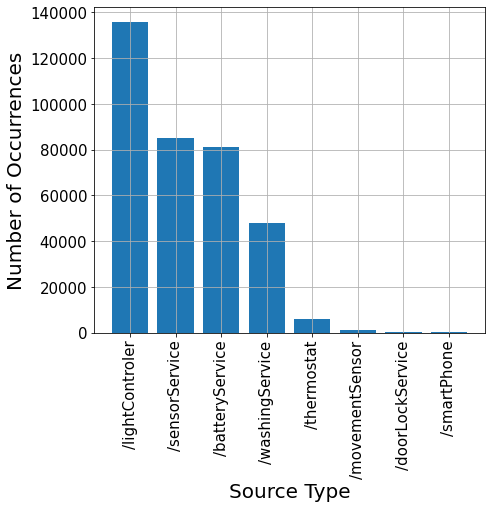

In [8]:
source_type_count = df_data_1.sourceType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(source_type_count.index, source_type_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Type', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
for i in source_type_count.index:
    print(i)

/lightControler
/sensorService
/batteryService
/washingService
/thermostat
/movementSensor
/doorLockService
/smartPhone


In [10]:
for i in source_type_count.values:
    print(i)

135775
85196
81267
47986
5980
1301
330
106


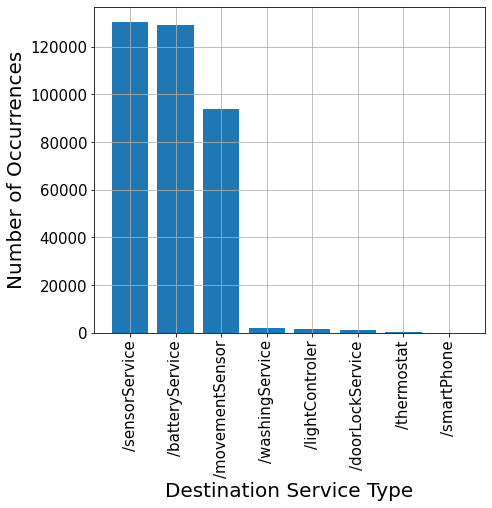

In [11]:
destination_type_count = df_data_1.destinationServiceType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(destination_type_count.index, destination_type_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Service Type', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [12]:
for i in destination_type_count.index:
    print(i)

/sensorService
/batteryService
/movementSensor
/washingService
/lightControler
/doorLockService
/thermostat
/smartPhone


In [13]:
for i in destination_type_count.values:
    print(i)

130313
129119
93645
1805
1694
1043
319
3


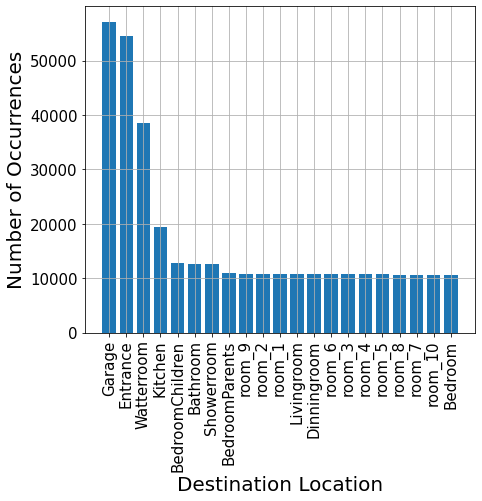

In [14]:
destination_location_count = df_data_1.destinationLocation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(destination_location_count.index, destination_location_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Location', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [15]:
for i in destination_location_count.index:
    print(i)

Garage
Entrance
Watterroom
Kitchen
BedroomChildren
Bathroom
Showerroom
BedroomParents
room_9
room_2
room_1
Livingroom
Dinningroom
room_6
room_3
room_4
room_5
room_8
room_7
room_10
Bedroom


In [16]:
for i in destination_location_count.values:
    print(i)

57100
54448
38524
19437
12768
12684
12583
10938
10843
10828
10805
10781
10759
10741
10732
10708
10687
10651
10649
10648
10627


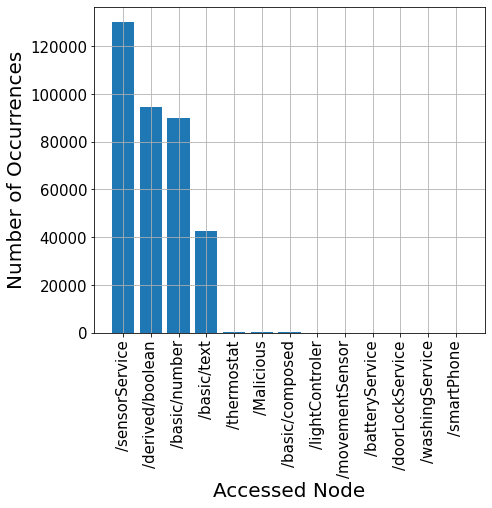

In [17]:
accessed_node_count = df_data_1.accessedNodeType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(accessed_node_count.index, accessed_node_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Accessed Node', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [18]:
for i in accessed_node_count.index:
    print(i)

/sensorService
/derived/boolean
/basic/number
/basic/text
/thermostat
/Malicious
/basic/composed
/lightControler
/movementSensor
/batteryService
/doorLockService
/washingService
/smartPhone


In [19]:
for i in accessed_node_count.values:
    print(i)

130155
94725
90010
42428
313
148
100
23
22
6
5
3
3


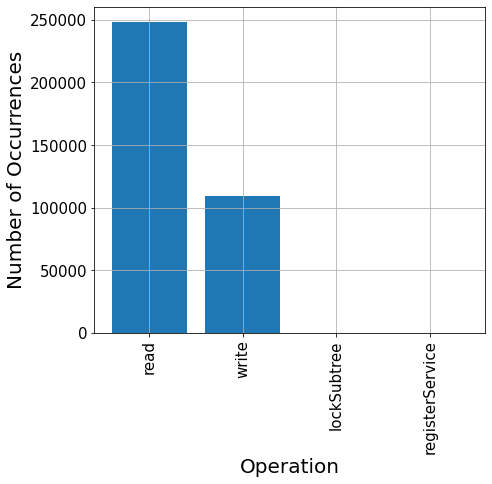

In [20]:
operation_count = df_data_1.operation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(operation_count.index, operation_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Operation', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [21]:
for i in operation_count.index:
    print(i)

read
write
lockSubtree
registerService


In [22]:
for i in operation_count.values:
    print(i)

248061
109648
148
84


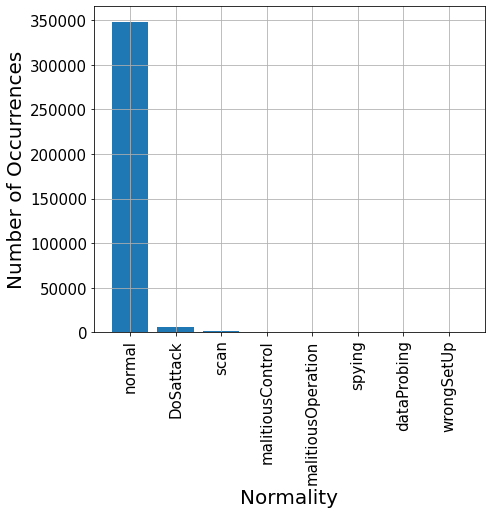

In [23]:
normality_count = df_data_1.normality.value_counts()
indices = ['normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(indices, normality_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Normality', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [24]:
for i in normality_count.index:
    print(i)

normal
anomalous(DoSattack)
anomalous(scan)
anomalous(malitiousControl)
anomalous(malitiousOperation)
anomalous(spying)
anomalous(dataProbing)
anomalous(wrongSetUp)


In [25]:
for i in normality_count.values:
    print(i)

347924
5780
1547
889
805
532
342
122


# Making Features

In [26]:
df_1 = df_data_1.drop('timestamp',axis=1)

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder0 = LabelEncoder()
labelencoder1 = LabelEncoder()
labelencoder4 = LabelEncoder()
labelencoder7 = LabelEncoder()
labelencodery = LabelEncoder()

In [28]:
X_0 = df_1.iloc[:,0].values
X_1 = df_1.iloc[:,1].values
X_4 = df_1.iloc[:,4].values
X_7 = df_1.iloc[:,7].values
y = df_1.iloc[:,11].values

In [29]:
X_0 = labelencoder0.fit_transform(X_0)
X_0 = X_0.reshape(len(X_0),1)
X_1 = labelencoder1.fit_transform(X_1)
X_1 = X_1.reshape(len(X_1),1)
X_4 = labelencoder4.fit_transform(X_4)
X_4 = X_4.reshape(len(X_4),1)
X_7 = labelencoder7.fit_transform(X_7)
X_7 = X_7.reshape(len(X_7),1)
y = labelencodery.fit_transform(y)

In [30]:
from sklearn.preprocessing import OneHotEncoder
ohe_2 = OneHotEncoder()
ohe_3 = OneHotEncoder()
ohe_5 = OneHotEncoder()
ohe_6 = OneHotEncoder()
ohe_8 = OneHotEncoder()
ohe_9 = OneHotEncoder()
le_2 = LabelEncoder()
le_3 = LabelEncoder()
le_5 = LabelEncoder()
le_6 = LabelEncoder()
le_8 = LabelEncoder()
le_9 = LabelEncoder()

In [31]:
X_2 = df_1.iloc[:,2].values
X_3 = df_1.iloc[:,3].values
X_5 = df_1.iloc[:,5].values
X_6 = df_1.iloc[:,6].values
X_8 = df_1.iloc[:,8].values
X_9 = df_1.iloc[:,9].values
X_10 = df_1.iloc[:,10].values

In [32]:
X_2 = le_2.fit_transform(X_2)
X_2 = X_2.reshape(len(X_2),1)
#X_2 = ohe_2.fit_transform(X_2)
X_3 = le_3.fit_transform(X_3)
X_3 = X_3.reshape(len(X_3),1)
#X_3 = ohe_3.fit_transform(X_3)
X_5 = le_5.fit_transform(X_5)
X_5 = X_5.reshape(len(X_5),1)
#X_5 = ohe_5.fit_transform(X_5)
X_6 = le_6.fit_transform(X_6)
X_6 = X_6.reshape(len(X_6),1)
#X_6 = ohe_6.fit_transform(X_6)
X_8 = le_8.fit_transform(X_8)
X_8 = X_8.reshape(len(X_8),1)
#X_8 = ohe_8.fit_transform(X_8)
X_9 = le_9.fit_transform(X_9)
X_9 = X_9.reshape(len(X_9),1)
#X_9 = ohe_9.fit_transform(X_9)
X_10 = X_10.reshape(len(X_10),1)

In [33]:
X = np.concatenate((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10),axis=1)

In [34]:
labelencodery.classes_

array(['anomalous(DoSattack)', 'anomalous(dataProbing)',
       'anomalous(malitiousControl)', 'anomalous(malitiousOperation)',
       'anomalous(scan)', 'anomalous(spying)', 'anomalous(wrongSetUp)',
       'normal'], dtype=object)

In [35]:
labelencodery.transform(['anomalous(dataProbing)'])

array([1])

In [36]:
y_resized = y.reshape(len(y),1)

In [37]:
df_spark = np.concatenate((y_resized,X),axis=1)

In [38]:
df_spark = pd.DataFrame(df_spark)

In [39]:
df_spark.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [40]:
y = df_spark.iloc[:,0].values
X = df_spark.iloc[:,1:].values

In [41]:
from sklearn.preprocessing import label_binarize

In [42]:
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])

In [43]:
n_classes = y.shape[1]

In [44]:
n_classes

8

# II STEP

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

#                                         5-Fold Cross validation Estimation Logistic Regression

In [47]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LogisticRegression(penalty='l2', random_state=0, max_iter=150)))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklear

In [48]:
for i in train_sizes:
    print(i)

57270
114540
171811
229081
286352


In [49]:
for i in train_mean:
    print(i)

0.9858564693556836
0.9701466736511263
0.9837775229758281
0.9811699791776707
0.9821073364250992


In [50]:
for i in test_mean:
    print(i)

0.8788652898530616
0.8791446664409662
0.9713193331715058
0.9706627998445926
0.9709393824730537


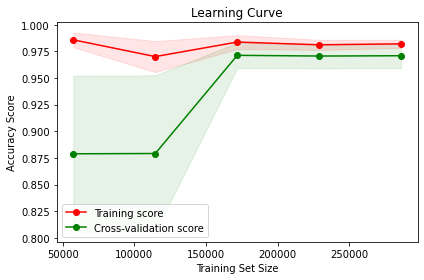

In [51]:
plt.plot(train_sizes, train_mean, "o-", color="r",  label="Training score")
plt.plot(train_sizes, test_mean, "o-", color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 5-Fold Cross validation Estimation for SVM

In [52]:
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LinearSVC(max_iter=5000)))])
train_sizes_svc, train_scores_svc, test_scores_svc = learning_curve(estimator=pipe_svc,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_svc = np.mean(train_scores_svc, axis=1)
train_std_svc = np.std(train_scores_svc, axis=1)
test_mean_svc = np.mean(test_scores_svc, axis=1)
test_std_svc = np.std(test_scores_svc, axis=1)

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklear

In [53]:
for i in train_mean_svc:
    print(i)

0.9548908678191026
0.9683900820674
0.9834667163336457
0.9802550189670903
0.9818412303738056


In [54]:
for i in test_mean_svc:
    print(i)

0.8477762805218887
0.8911382972046716
0.971858525118957
0.9700342078682395
0.9708192532610813


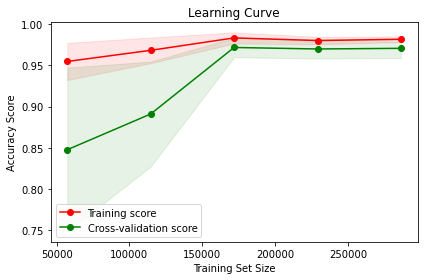

In [55]:
plt.plot(train_sizes_svc, train_mean_svc, "o-", color="r",  label="Training score")
plt.plot(train_sizes_svc, test_mean_svc, "o-", color="g", label="Cross-validation score")

plt.fill_between(train_sizes_svc, train_mean_svc - train_std_svc, train_mean_svc + train_std_svc, alpha=0.1, color="r")
plt.fill_between(train_sizes_svc, test_mean_svc - test_std_svc, test_mean_svc + test_std_svc, alpha=0.1, color="g")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 5-Fold Cross validation Estimation for Decision Tree

In [56]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(tree.DecisionTreeClassifier()))])
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(estimator=pipe_tree,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_tree = np.mean(train_scores_tree, axis=1)
train_std_tree = np.std(train_scores_tree, axis=1)
test_mean_tree = np.mean(test_scores_tree, axis=1)
test_std_tree = np.std(test_scores_tree, axis=1)

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklear

In [57]:
for i in train_mean_tree:
    print(i)

0.9893975903614457
0.9894779116465864
0.9906874414327372
0.9928566751498378
0.9942574174442644


In [58]:
for i in test_mean_tree:
    print(i)

0.9572247912894071
0.8498129345536414
0.9722440683412517
0.9741661797920917
0.9758144985933589


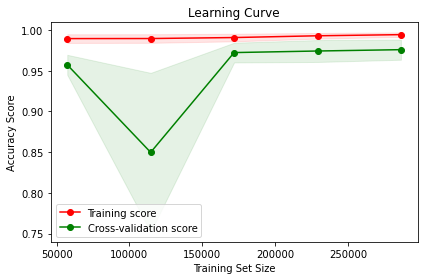

In [59]:
plt.plot(train_sizes_tree, train_mean_tree, "o-", color="r",  label="Training score")
plt.plot(train_sizes_tree, test_mean_tree, "o-", color="g", label="Cross-validation score")

plt.fill_between(train_sizes_tree, train_mean_tree - train_std_tree, train_mean_tree + train_std_tree, alpha=0.1, color="r")
plt.fill_between(train_sizes_tree, test_mean_tree - test_std_tree, test_mean_tree + test_std_tree, alpha=0.1, color="g")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 5-Fold Cross validation Estimation for Random Forest

In [60]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(RandomForestClassifier(warm_start=True,n_estimators=10)))])
train_sizes_rnd, train_scores_rnd, test_scores_rnd = learning_curve(estimator=pipe_rnd,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_rnd = np.mean(train_scores_rnd, axis=1)
train_std_rnd = np.std(train_scores_rnd, axis=1)
test_mean_rnd = np.mean(test_scores_rnd, axis=1)
test_std_rnd = np.std(test_scores_rnd, axis=1)

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklear

In [61]:
for i in train_mean_rnd:
    print(i)

0.989394098131657
0.9894779116465864
0.9883453329530706
0.9928566751498378
0.9942574174442644


In [62]:
for i in test_mean_rnd:
    print(i)

0.9538191925857138
0.9257390674250724
0.9694950042913233
0.9734425944044434
0.9751160569284725


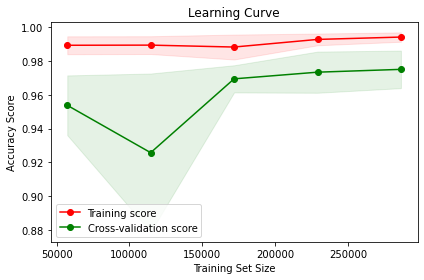

In [63]:
plt.plot(train_sizes_rnd, train_mean_rnd, "o-", color="r",  label="Training score")
plt.plot(train_sizes_rnd, test_mean_rnd, "o-", color="g", label="Cross-validation score")

plt.fill_between(train_sizes_rnd, train_mean_rnd - train_std_rnd, train_mean_rnd + train_std_rnd, alpha=0.1, color="r")
plt.fill_between(train_sizes_rnd, test_mean_rnd - test_std_rnd, test_mean_rnd + test_std_rnd, alpha=0.1, color="g")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 5-Fold Cross validation Estimation for ANN

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(mlp))])
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(estimator=pipe_mlp,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_mlp = np.mean(train_scores_mlp, axis=1)
train_std_mlp = np.std(train_scores_mlp, axis=1)
test_mean_mlp = np.mean(test_scores_mlp, axis=1)
test_std_mlp = np.std(test_scores_mlp, axis=1)

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(


Iteration 1, loss = 0.01232983
Iteration 2, loss = 0.00183438
Iteration 1, loss = 0.00579197
Iteration 3, loss = 0.00080459
Iteration 4, loss = 0.00052826
Iteration 2, loss = 0.00177571
Iteration 1, loss = 0.00452756
Iteration 5, loss = 0.00043123
Iteration 1, loss = 0.00575923
Iteration 6, loss = 0.00036393
Iteration 3, loss = 0.00159869
Iteration 7, loss = 0.00031382
Iteration 8, loss = 0.00028168
Iteration 4, loss = 0.00147265
Iteration 2, loss = 0.00011904
Iteration 9, loss = 0.00025232
Iteration 5, loss = 0.00139396
Iteration 10, loss = 0.00022640
Iteration 6, loss = 0.00130759
Iteration 2, loss = 0.00132677
Iteration 11, loss = 0.00021045
Iteration 7, loss = 0.00123298
Iteration 3, loss = 0.00007564
Iteration 12, loss = 0.00019116
Iteration 13, loss = 0.00017644
Iteration 8, loss = 0.00116764
Iteration 14, loss = 0.00016620
Iteration 3, loss = 0.00117934
Iteration 4, loss = 0.00005772
Iteration 9, loss = 0.00112097
Iteration 15, loss = 0.00015238
Training loss did not improve mor

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(


Iteration 1, loss = 0.01285893
Iteration 10, loss = 0.00105946
Iteration 2, loss = 0.00177035
Iteration 5, loss = 0.00004815
Iteration 11, loss = 0.00098271
Iteration 3, loss = 0.00077619
Iteration 4, loss = 0.00110478
Iteration 4, loss = 0.00049890
Iteration 12, loss = 0.00094819
Iteration 5, loss = 0.00040838
Iteration 13, loss = 0.00088119
Iteration 6, loss = 0.00004212
Iteration 6, loss = 0.00035230
Iteration 14, loss = 0.00084364
Iteration 7, loss = 0.00031254
Iteration 5, loss = 0.00106878
Iteration 8, loss = 0.00028829
Iteration 7, loss = 0.00003773
Iteration 15, loss = 0.00078685
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(


Iteration 9, loss = 0.00026063
Iteration 10, loss = 0.00023523
Iteration 1, loss = 0.01155726
Iteration 11, loss = 0.00021954
Iteration 8, loss = 0.00003454
Iteration 2, loss = 0.00151718
Iteration 6, loss = 0.00105362
Iteration 12, loss = 0.00020042
Iteration 13, loss = 0.00018548
Iteration 3, loss = 0.00063392
Iteration 9, loss = 0.00003201
Iteration 14, loss = 0.00017536
Iteration 7, loss = 0.00102344
Iteration 4, loss = 0.00037692
Iteration 15, loss = 0.00016072
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 10, loss = 0.00003009
Iteration 5, loss = 0.00026616
Iteration 8, loss = 0.00101800
Iteration 6, loss = 0.00020614
Iteration 7, loss = 0.00016797
Iteration 11, loss = 0.00002850
Iteration 9, loss = 0.00102459
Iteration 8, loss = 0.00014217
Iteration 12, loss = 0.00002714
Iteration 9, loss = 0.00012355
Iteration 10, loss = 0.00100349
Iteration 1, loss = 0.00493936
Iteration 10, loss = 0.00010977
Iteration 13, loss = 0.00002600

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(


Iteration 3, loss = 0.00109166
Iteration 13, loss = 0.00100315
Iteration 4, loss = 0.00156551
Iteration 1, loss = 0.00800485
Iteration 2, loss = 0.00140723
Iteration 14, loss = 0.00099026
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 3, loss = 0.00067433
Iteration 5, loss = 0.00141599
Iteration 4, loss = 0.00101772
Iteration 4, loss = 0.00049075
Iteration 6, loss = 0.00126827
Iteration 5, loss = 0.00040747
Iteration 1, loss = 0.00491141
Iteration 6, loss = 0.00034511
Iteration 7, loss = 0.00108181
Iteration 5, loss = 0.00100301
Iteration 7, loss = 0.00031036
Iteration 8, loss = 0.00091281
Iteration 8, loss = 0.00027826
Iteration 2, loss = 0.00209747
Iteration 9, loss = 0.00075401
Iteration 9, loss = 0.00024918
Iteration 6, loss = 0.00097782
Iteration 10, loss = 0.00022908
Iteration 10, loss = 0.00062041
Iteration 3, loss = 0.00172739
Iteration 11, loss = 0.00020400
Iteration 11, loss = 0.00051444
Iteration 7, loss = 0.00094767
Itera

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(


Iteration 14, loss = 0.00029570
Iteration 1, loss = 0.01709154
Iteration 9, loss = 0.00094836
Iteration 6, loss = 0.00110896
Iteration 2, loss = 0.00433808
Iteration 15, loss = 0.00025487
Iteration 3, loss = 0.00270147
Iteration 16, loss = 0.00022107
Iteration 7, loss = 0.00098765
Iteration 10, loss = 0.00094585
Iteration 4, loss = 0.00212350
Iteration 17, loss = 0.00019546
Iteration 5, loss = 0.00185353
Iteration 8, loss = 0.00084638
Iteration 18, loss = 0.00017204
Iteration 6, loss = 0.00164232
Iteration 11, loss = 0.00093371
Iteration 7, loss = 0.00150251
Iteration 19, loss = 0.00015862
Iteration 9, loss = 0.00071952
Iteration 8, loss = 0.00136391
Iteration 20, loss = 0.00014477
Iteration 12, loss = 0.00093853
Iteration 9, loss = 0.00128543
Iteration 10, loss = 0.00061528
Iteration 10, loss = 0.00114750
Iteration 21, loss = 0.00013328
Iteration 11, loss = 0.00050018
Iteration 11, loss = 0.00101729
Iteration 12, loss = 0.00095374
Iteration 22, loss = 0.00012323
Training loss did not 

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(


Iteration 1, loss = 0.01921122
Iteration 4, loss = 0.00043082
Iteration 10, loss = 0.00054136
Iteration 2, loss = 0.00243797
Iteration 3, loss = 0.00125949
Iteration 4, loss = 0.00072680
Iteration 5, loss = 0.00032153
Iteration 4, loss = 0.00090093
Iteration 5, loss = 0.00073460
Iteration 6, loss = 0.00062719
Iteration 6, loss = 0.00026062
Iteration 7, loss = 0.00055536
Iteration 11, loss = 0.00046565
Iteration 8, loss = 0.00050095
Iteration 5, loss = 0.00051589
Iteration 7, loss = 0.00021929
Iteration 9, loss = 0.00045750
Iteration 10, loss = 0.00041929
Iteration 8, loss = 0.00019037
Iteration 11, loss = 0.00038503
Iteration 12, loss = 0.00036071
Iteration 13, loss = 0.00034214
Iteration 12, loss = 0.00038679
Iteration 14, loss = 0.00032072
Iteration 6, loss = 0.00036640
Iteration 9, loss = 0.00017431
Iteration 15, loss = 0.00030493
Iteration 16, loss = 0.00028855
Iteration 17, loss = 0.00027327
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(


Iteration 9, loss = 0.00015784
Iteration 17, loss = 0.00017930
Iteration 10, loss = 0.00013750
Iteration 12, loss = 0.00011907
Iteration 11, loss = 0.00012202
Iteration 1, loss = 0.00794190
Iteration 12, loss = 0.00010986
Iteration 13, loss = 0.00009998
Iteration 14, loss = 0.00009199
Iteration 13, loss = 0.00010810
Iteration 2, loss = 0.00213738
Iteration 18, loss = 0.00015992
Iteration 15, loss = 0.00008532
Iteration 16, loss = 0.00007973
Iteration 3, loss = 0.00103400
Iteration 17, loss = 0.00007489
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 14, loss = 0.00009844
Iteration 1, loss = 0.01258156
Iteration 2, loss = 0.00339695
Iteration 3, loss = 0.00240885
Iteration 19, loss = 0.00014110
Iteration 4, loss = 0.00060377
Iteration 4, loss = 0.00205306
Iteration 15, loss = 0.00009067
Iteration 5, loss = 0.00179246
Iteration 6, loss = 0.00157930
Iteration 7, loss = 0.00139386
Iteration 5, loss = 0.00041312
Iteration 8, loss = 0.00123

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(


Iteration 24, loss = 0.02959869
Iteration 25, loss = 0.02989605
Iteration 8, loss = 0.00015775
Iteration 26, loss = 0.02955862
Iteration 5, loss = 0.00043265
Iteration 27, loss = 0.02971682
Iteration 1, loss = 0.01394516
Iteration 28, loss = 0.02964686
Iteration 29, loss = 0.02967060
Iteration 30, loss = 0.02942534
Iteration 2, loss = 0.00464302
Iteration 9, loss = 0.00014179
Iteration 31, loss = 0.02943424
Iteration 32, loss = 0.02957116
Iteration 6, loss = 0.00033362
Iteration 3, loss = 0.00303218
Iteration 33, loss = 0.02935008
Iteration 34, loss = 0.02937024
Iteration 10, loss = 0.00012945
Iteration 35, loss = 0.02927390
Iteration 4, loss = 0.00201921
Iteration 36, loss = 0.02931478
Iteration 7, loss = 0.00027354
Iteration 37, loss = 0.02915048
Iteration 5, loss = 0.00145367
Iteration 38, loss = 0.02945232
Iteration 39, loss = 0.02901724
Iteration 11, loss = 0.00011849
Iteration 40, loss = 0.02921867
Iteration 6, loss = 0.00120096
Iteration 8, loss = 0.00023550
Iteration 41, loss =

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(


Iteration 2, loss = 0.00189690
Iteration 1, loss = 0.01008079
Iteration 11, loss = 0.00009711
Iteration 17, loss = 0.00008544
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 2, loss = 0.00131050
Iteration 3, loss = 0.00145521
Iteration 12, loss = 0.00008944
Iteration 3, loss = 0.00072544
Iteration 4, loss = 0.00116991
Iteration 4, loss = 0.00054675
Iteration 1, loss = 0.00747476
Iteration 13, loss = 0.00008327
Iteration 5, loss = 0.00045136
Iteration 5, loss = 0.00092371
Iteration 2, loss = 0.00259728
Iteration 6, loss = 0.00038616
Iteration 14, loss = 0.00007863
Iteration 6, loss = 0.00073281
Iteration 7, loss = 0.00034032
Iteration 3, loss = 0.00134760
Iteration 8, loss = 0.00030194
Iteration 7, loss = 0.00058546
Iteration 4, loss = 0.00068479
Iteration 15, loss = 0.00007522
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 9, loss = 0.00027255
Iteration 8, loss = 0.00046780
Iteratio

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(


Iteration 11, loss = 0.00011226
Iteration 2, loss = 0.00504264
Iteration 11, loss = 0.00018937
Iteration 12, loss = 0.00009637
Iteration 3, loss = 0.00360897
Iteration 1, loss = 0.02673425
Iteration 13, loss = 0.00008041
Iteration 4, loss = 0.00258956
Iteration 14, loss = 0.00006572
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 12, loss = 0.00017045
Iteration 2, loss = 0.00907499
Iteration 5, loss = 0.00178127
Iteration 6, loss = 0.00128578
Iteration 1, loss = 0.00695267
Iteration 13, loss = 0.00015479
Iteration 3, loss = 0.00487421
Iteration 7, loss = 0.00096240
Iteration 2, loss = 0.00101381
Iteration 14, loss = 0.00014269
Iteration 8, loss = 0.00076628
Iteration 4, loss = 0.00339857
Iteration 9, loss = 0.00063981
Iteration 3, loss = 0.00063368
Iteration 15, loss = 0.00013305
Iteration 10, loss = 0.00052863
Iteration 4, loss = 0.00049733
Iteration 5, loss = 0.00275676
Iteration 16, loss = 0.00012518
Iteration 11, loss = 0.00045732

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(


Iteration 12, loss = 0.00019588
Iteration 5, loss = 0.01501632
Iteration 5, loss = 0.02487093
Iteration 6, loss = 0.02409691
Iteration 13, loss = 0.00017010
Iteration 6, loss = 0.01489355
Iteration 1, loss = 0.02488306
Iteration 7, loss = 0.02356698
Iteration 8, loss = 0.02312576
Iteration 14, loss = 0.00015212
Iteration 7, loss = 0.01489672
Iteration 9, loss = 0.02286054
Iteration 2, loss = 0.00904984
Iteration 10, loss = 0.02251589
Iteration 15, loss = 0.00013349
Iteration 11, loss = 0.02222164
Iteration 8, loss = 0.01484891
Iteration 12, loss = 0.02197698
Iteration 16, loss = 0.00012381
Iteration 3, loss = 0.00563071
Iteration 13, loss = 0.02198289
Iteration 9, loss = 0.01489876
Iteration 17, loss = 0.00011320
Iteration 14, loss = 0.02174466
Iteration 18, loss = 0.00010457
Iteration 10, loss = 0.01484825
Iteration 15, loss = 0.02185132
Iteration 4, loss = 0.00406004
Iteration 16, loss = 0.02173477
Iteration 19, loss = 0.00009824
Training loss did not improve more than tol=0.000100 f

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(


Iteration 4, loss = 0.00072077
Iteration 1, loss = 0.01921122
Iteration 2, loss = 0.00243797
Iteration 5, loss = 0.02032958
Iteration 3, loss = 0.00125949
Iteration 4, loss = 0.00090093
Iteration 6, loss = 0.01975584
Iteration 5, loss = 0.00073460
Iteration 5, loss = 0.00052566
Iteration 4, loss = 0.00113988
Iteration 6, loss = 0.00062719
Iteration 7, loss = 0.01926310
Iteration 7, loss = 0.00055536
Iteration 8, loss = 0.00050095
Iteration 8, loss = 0.01911227
Iteration 9, loss = 0.00045750
Iteration 6, loss = 0.00037851
Iteration 10, loss = 0.00041929
Iteration 5, loss = 0.00084871
Iteration 11, loss = 0.00038503
Iteration 12, loss = 0.00036071
Iteration 9, loss = 0.01867116
Iteration 13, loss = 0.00034214
Iteration 14, loss = 0.00032072
Iteration 15, loss = 0.00030493
Iteration 16, loss = 0.00028855
Iteration 7, loss = 0.00028304
Iteration 17, loss = 0.00027327
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 10, loss = 0.01845729
It

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(


Iteration 1, loss = 0.01015438
Iteration 15, loss = 0.00030684
Iteration 6, loss = 0.00021873
Iteration 8, loss = 0.00005033
Iteration 2, loss = 0.00137740
Iteration 9, loss = 0.00004542
Iteration 16, loss = 0.00028025
Iteration 7, loss = 0.00018514
Iteration 3, loss = 0.00075716
Iteration 4, loss = 0.00056252
Iteration 10, loss = 0.00004162
Iteration 17, loss = 0.00025736
Iteration 5, loss = 0.00046428
Iteration 11, loss = 0.00003857
Iteration 8, loss = 0.00015873
Iteration 6, loss = 0.00039667
Iteration 18, loss = 0.00024193
Iteration 7, loss = 0.00034887
Iteration 12, loss = 0.00003604
Iteration 19, loss = 0.00022385
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 8, loss = 0.00030895
Iteration 9, loss = 0.00013731
Iteration 13, loss = 0.00003399
Iteration 1, loss = 0.00998995
Iteration 9, loss = 0.00027862
Iteration 10, loss = 0.00025404
Iteration 14, loss = 0.00003226
Training loss did not improve more than tol=0.000100 for 10 co

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(


Iteration 2, loss = 0.00090985
Iteration 1, loss = 0.01921122
Iteration 2, loss = 0.00243797
Iteration 11, loss = 0.00016794
Iteration 3, loss = 0.00125949
Iteration 4, loss = 0.00090093
Iteration 18, loss = 0.01414762
Iteration 5, loss = 0.00073460
Iteration 3, loss = 0.00052382
Iteration 12, loss = 0.00014393
Iteration 6, loss = 0.00062719
Iteration 7, loss = 0.00055536
Iteration 8, loss = 0.00050095
Iteration 13, loss = 0.00012505
Iteration 4, loss = 0.00033018
Iteration 9, loss = 0.00045750
Iteration 19, loss = 0.01428662
Iteration 10, loss = 0.00041929
Iteration 11, loss = 0.00038503
Iteration 12, loss = 0.00036071
Iteration 5, loss = 0.00022118
Iteration 14, loss = 0.00011210
Iteration 13, loss = 0.00034214
Iteration 20, loss = 0.01420459
Iteration 14, loss = 0.00032072
Iteration 15, loss = 0.00030493
Iteration 6, loss = 0.00015990
Iteration 16, loss = 0.00028855
Iteration 15, loss = 0.00010106
Iteration 17, loss = 0.00027327
Training loss did not improve more than tol=0.000100 f

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(


Iteration 1, loss = 0.01015438
Iteration 6, loss = 0.00022129
Iteration 13, loss = 0.01720196
Iteration 6, loss = 0.00085292
Iteration 2, loss = 0.00137740
Iteration 3, loss = 0.00075716
Iteration 7, loss = 0.00018413
Iteration 14, loss = 0.01719818
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 7, loss = 0.00061319
Iteration 4, loss = 0.00056252
Iteration 8, loss = 0.00015748
Iteration 1, loss = 0.00505439
Iteration 5, loss = 0.00046428
Iteration 6, loss = 0.00039667
Iteration 8, loss = 0.00047710
Iteration 2, loss = 0.00033329
Iteration 9, loss = 0.00013697
Iteration 7, loss = 0.00034887
Iteration 3, loss = 0.00015376
Iteration 8, loss = 0.00030895
Iteration 9, loss = 0.00038485
Iteration 10, loss = 0.00012207
Iteration 9, loss = 0.00027862
Iteration 4, loss = 0.00010610
Iteration 10, loss = 0.00025404
Iteration 10, loss = 0.00033061
Iteration 11, loss = 0.00010997
Iteration 11, loss = 0.00023369
Iteration 5, loss = 0.00008172
Iter

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(


Iteration 17, loss = 0.00015532
Iteration 9, loss = 0.00055398
Iteration 1, loss = 0.01039035
Iteration 3, loss = 0.00333701
Iteration 18, loss = 0.00014526
Iteration 10, loss = 0.00046485
Iteration 2, loss = 0.00148879
Iteration 11, loss = 0.00038513
Iteration 4, loss = 0.00176518
Iteration 19, loss = 0.00013568
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 12, loss = 0.00032730
Iteration 3, loss = 0.00069317
Iteration 5, loss = 0.00113402
Iteration 13, loss = 0.00027672
Iteration 4, loss = 0.00046050
Iteration 1, loss = 0.00399997
Iteration 14, loss = 0.00024834
Iteration 6, loss = 0.00081720
Iteration 15, loss = 0.00021910
Iteration 5, loss = 0.00034894
Iteration 2, loss = 0.00106114
Iteration 16, loss = 0.00019985
Iteration 7, loss = 0.00065648
Iteration 17, loss = 0.00017616
Iteration 6, loss = 0.00028442
Iteration 18, loss = 0.00016302
Iteration 3, loss = 0.00081040
Iteration 8, loss = 0.00054726
Iteration 7, loss = 0.00024060

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(


Iteration 1, loss = 0.01921122
Iteration 2, loss = 0.00243797
Iteration 5, loss = 0.00063390
Iteration 3, loss = 0.00125949
Iteration 17, loss = 0.01435553
Iteration 12, loss = 0.01349278
Iteration 4, loss = 0.00090093
Iteration 5, loss = 0.00073460
Iteration 6, loss = 0.00062719
Iteration 7, loss = 0.00055536
Iteration 6, loss = 0.00046532
Iteration 8, loss = 0.00050095
Iteration 9, loss = 0.00045750
Iteration 10, loss = 0.00041929
Iteration 11, loss = 0.00038503
Iteration 18, loss = 0.01418962
Iteration 13, loss = 0.01350894
Iteration 12, loss = 0.00036071
Iteration 13, loss = 0.00034214
Iteration 7, loss = 0.00035566
Iteration 14, loss = 0.00032072
Iteration 15, loss = 0.00030493
Iteration 19, loss = 0.01431196
Iteration 16, loss = 0.00028855
Iteration 14, loss = 0.01350291
Iteration 17, loss = 0.00027327
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 8, loss = 0.00028696
Iteration 1, loss = 0.01240904
Iteration 20, loss = 0.01414

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(


Iteration 2, loss = 0.00107954
Iteration 15, loss = 0.00009863
Iteration 1, loss = 0.01015438
Iteration 1, loss = 0.02246119
Iteration 2, loss = 0.00137740
Iteration 3, loss = 0.00066041
Iteration 2, loss = 0.01769256
Iteration 16, loss = 0.00009297
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 3, loss = 0.00075716
Iteration 4, loss = 0.00056252
Iteration 3, loss = 0.01747369
Iteration 4, loss = 0.00052080
Iteration 5, loss = 0.00046428
Iteration 1, loss = 0.00769101
Iteration 4, loss = 0.01739841
Iteration 6, loss = 0.00039667
Iteration 5, loss = 0.00043663
Iteration 5, loss = 0.01736034
Iteration 7, loss = 0.00034887
Iteration 2, loss = 0.00399237
Iteration 8, loss = 0.00030895
Iteration 6, loss = 0.00037411
Iteration 6, loss = 0.01731174
Iteration 9, loss = 0.00027862
Iteration 3, loss = 0.00249419
Iteration 10, loss = 0.00025404
Iteration 7, loss = 0.00033074
Iteration 7, loss = 0.01724025
Iteration 11, loss = 0.00023369
Iterati

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(


Iteration 9, loss = 0.00014573
Iteration 6, loss = 0.00023438
Iteration 7, loss = 0.00018432
Iteration 1, loss = 0.01039035
Iteration 10, loss = 0.00012889
Iteration 20, loss = 0.00007974
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.Iteration 8, loss = 0.00015190

Iteration 9, loss = 0.00012985
Iteration 2, loss = 0.00148879
Iteration 11, loss = 0.00011540
Iteration 1, loss = 0.01028490
Iteration 10, loss = 0.00011385
Iteration 3, loss = 0.00069317
Iteration 11, loss = 0.00010164
Iteration 12, loss = 0.00010537
Iteration 2, loss = 0.00418177
Iteration 12, loss = 0.00009218
Iteration 4, loss = 0.00046050
Iteration 13, loss = 0.00008465
Iteration 3, loss = 0.00211513
Iteration 5, loss = 0.00034894
Iteration 13, loss = 0.00009645
Iteration 14, loss = 0.00007851
Iteration 4, loss = 0.00118759
Iteration 6, loss = 0.00028442
Iteration 15, loss = 0.00007335
Iteration 16, loss = 0.00006908
Training loss did not improve more than tol=0.000100 for 10 c

In [65]:
for i in train_mean_mlp:
    print(i)

0.989334730225249
0.9893871136720798
0.9880578077073062
0.9903737106089114
0.9942385595351176


In [66]:
for i in test_mean_mlp:
    print(i)

0.903564960032772
0.9035761353632195
0.9673885059955196
0.9713752083017665
0.9749707812619846


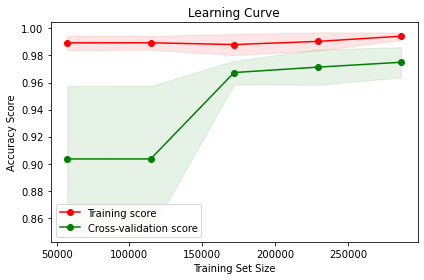

In [67]:
plt.plot(train_sizes_mlp, train_mean_mlp, "o-", color="r",  label="Training score")
plt.plot(train_sizes_mlp, test_mean_mlp, "o-", color="g", label="Cross-validation score")

plt.fill_between(train_sizes_mlp, train_mean_mlp - train_std_mlp, train_mean_mlp + train_std_mlp, alpha=0.1, color="r")
plt.fill_between(train_sizes_mlp, test_mean_mlp - test_std_mlp, test_mean_mlp + test_std_mlp, alpha=0.1, color="g")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Mean values of Training and Testing accuracies and Standard Deviation of Training and Testing accuracies are given below

In [68]:
np.mean(train_mean) , np.mean(train_mean_svc), np.mean(train_mean_tree), np.mean(train_mean_rnd), np.mean(train_mean_mlp)

(0.9806115963170816,
 0.9737687831122088,
 0.9913354072069742,
 0.9908662870650833,
 0.9902783843497328)

In [69]:
np.mean(train_std) , np.mean(train_std_svc), np.mean(train_std_tree), np.mean(train_std_rnd), np.mean(train_std_mlp)

(0.007329269758804014,
 0.010569046201570028,
 0.0042972409370573734,
 0.004842465039214722,
 0.005530092194388982)

In [70]:
np.mean(test_mean) , np.mean(test_mean_svc), np.mean(test_mean_tree), np.mean(test_mean_rnd), np.mean(test_mean_mlp)

(0.934186294356636,
 0.9303253127949676,
 0.9458524945139501,
 0.9595223831270051,
 0.9441751181910524)

In [71]:
np.mean(test_std) , np.mean(test_std_svc), np.mean(test_std_tree), np.mean(test_std_rnd), np.mean(test_std_mlp)

(0.036333607556785844,
 0.0396884144671917,
 0.029538626287945673,
 0.019198172282900813,
 0.028099495065451896)

# Evaluation Metrics Calculations

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

# For Logisitic Regression

In [73]:
pipe_lr = pipe_lr.fit(X_train, y_train)

In [74]:
y_pred_train = pipe_lr.predict(X_train)

In [75]:
y_pred_test = pipe_lr.predict(X_test)

In [76]:
accuracy_score(y_train, y_pred_train)

0.9820780018997597

In [77]:
accuracy_score(y_test, y_pred_test)

0.9822039698836413

In [78]:
target_names = ['Normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']

In [79]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.96      0.65      0.78      4602
         DoSattack       1.00      0.59      0.74       279
              scan       0.97      0.92      0.95       720
  malitiousControl       1.00      0.48      0.64       650
malitiousOperation       0.95      0.46      0.62      1242
            spying       0.00      0.00      0.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.98      1.00      0.99    278353

         micro avg       0.98      0.99      0.99    286352
         macro avg       0.86      0.64      0.72    286352
      weighted avg       0.98      0.99      0.98    286352
       samples avg       0.98      0.99      0.99    286352



/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.96      0.66      0.78      1178
         DoSattack       1.00      0.57      0.73        63
              scan       0.97      0.92      0.95       169
  malitiousControl       1.00      0.50      0.67       155
malitiousOperation       0.95      0.41      0.58       305
            spying       0.00      0.00      0.00       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.98      1.00      0.99     69571

         micro avg       0.98      0.99      0.99     71589
         macro avg       0.86      0.63      0.71     71589
      weighted avg       0.98      0.99      0.98     71589
       samples avg       0.98      0.99      0.99     71589



/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
cnf_matrix

array([[  775,     0,     0,     0,     0,     0,     0,   403],
       [    0,    36,     0,     0,     0,     0,     0,    27],
       [    0,     0,   155,     0,     0,     0,     0,    14],
       [    0,     0,     0,    78,     0,     0,     0,    77],
       [    5,     0,     3,     0,   125,     0,     0,   172],
       [    0,     0,     0,     0,     7,     0,     0,   113],
       [    0,     0,     0,     0,     0,     0,    28,     0],
       [   90,     0,     1,     0,     0,     0,     0, 69480]])

# For SVM

In [82]:
pipe_svc = pipe_svc.fit(X_train, y_train)
y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)

In [83]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9813725764094541, 0.9813798209222088)

In [84]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.96      0.65      0.78      4602
         DoSattack       1.00      0.59      0.74       279
              scan       0.95      0.92      0.93       720
  malitiousControl       1.00      0.15      0.26       650
malitiousOperation       1.00      0.21      0.34      1242
            spying       0.00      0.00      0.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.98      1.00      0.99    278353

         micro avg       0.98      0.99      0.98    286352
         macro avg       0.86      0.57      0.63    286352
      weighted avg       0.98      0.99      0.98    286352
       samples avg       0.98      0.99      0.98    286352



/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.95      0.66      0.78      1178
         DoSattack       1.00      0.57      0.73        63
              scan       0.95      0.92      0.93       169
  malitiousControl       1.00      0.12      0.21       155
malitiousOperation       1.00      0.19      0.32       305
            spying       0.00      0.00      0.00       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.98      1.00      0.99     69571

         micro avg       0.98      0.99      0.98     71589
         macro avg       0.86      0.56      0.62     71589
      weighted avg       0.98      0.99      0.98     71589
       samples avg       0.98      0.99      0.98     71589



/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
cnf_matrix

array([[  775,     0,     0,     0,     0,     0,     0,   403],
       [    0,    36,     0,     0,     0,     0,     0,    27],
       [    0,     0,   155,     0,     0,     0,     0,    14],
       [   33,     0,     0,    18,     0,     0,     0,   104],
       [    3,     0,     9,     0,    55,     0,     0,   238],
       [    0,     0,     0,     0,     0,     0,     0,   120],
       [    0,     0,     0,     0,     0,     0,    28,     0],
       [   90,     0,     0,     0,     0,     0,     0, 69481]])

# For Decision Tree

In [87]:
pipe_tree = pipe_tree.fit(X_train, y_train)
y_pred_train = pipe_tree.predict(X_train)
y_pred_test = pipe_tree.predict(X_test)

In [88]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942413532994356, 0.994091271005322)

In [89]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

         micro avg       0.99      0.99      0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352
       samples avg       0.99      0.99      0.99    286352



In [90]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       1.00      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       1.00      1.00      1.00       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

         micro avg       0.99      0.99      0.99     71589
         macro avg       1.00      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589
       samples avg       0.99      0.99      0.99     71589



/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
cnf_matrix

array([[  775,     0,     0,     0,     0,     0,     0,   403],
       [    0,    63,     0,     0,     0,     0,     0,     0],
       [    0,     0,   169,     0,     0,     0,     0,     0],
       [    0,     0,     0,   155,     0,     0,     0,     0],
       [    0,     0,     0,     0,   305,     0,     0,     0],
       [    0,     0,     0,     0,     0,   120,     0,     0],
       [    0,     0,     0,     0,     0,     0,    28,     0],
       [   20,     0,     0,     0,     0,     0,     0, 69551]])

# For Random Forest

In [92]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

In [93]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942413532994356, 0.994119208258252)

In [94]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

         micro avg       0.99      0.99      0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352
       samples avg       0.99      0.99      0.99    286352



In [95]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       1.00      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       1.00      1.00      1.00       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

         micro avg       0.99      0.99      0.99     71589
         macro avg       1.00      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589
       samples avg       0.99      0.99      0.99     71589



In [96]:
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
cnf_matrix

array([[  775,     0,     0,     0,     0,     0,     0,   403],
       [    0,    63,     0,     0,     0,     0,     0,     0],
       [    0,     0,   169,     0,     0,     0,     0,     0],
       [    0,     0,     0,   155,     0,     0,     0,     0],
       [    0,     0,     0,     0,   305,     0,     0,     0],
       [    0,     0,     0,     0,     0,   120,     0,     0],
       [    0,     0,     0,     0,     0,     0,    28,     0],
       [   18,     0,     0,     0,     0,     0,     0, 69553]])

# For ANN

In [97]:
pipe_mlp = pipe_mlp.fit(X_train, y_train)
y_pred_train = pipe_mlp.predict(X_train)
y_pred_test = pipe_mlp.predict(X_test)

Iteration 1, loss = 0.01747635
Iteration 2, loss = 0.01242359
Iteration 3, loss = 0.01219138
Iteration 4, loss = 0.01213977
Iteration 5, loss = 0.01206942
Iteration 6, loss = 0.01195333
Iteration 7, loss = 0.01190263
Iteration 8, loss = 0.01188070
Iteration 9, loss = 0.01179250
Iteration 10, loss = 0.01184380
Iteration 11, loss = 0.01180049
Iteration 12, loss = 0.01182816
Iteration 13, loss = 0.01178547
Iteration 14, loss = 0.01173279
Iteration 15, loss = 0.01179253
Iteration 16, loss = 0.01172668
Iteration 17, loss = 0.01173873
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.00544625
Iteration 2, loss = 0.00202050
Iteration 3, loss = 0.00149718
Iteration 4, loss = 0.00114145
Iteration 5, loss = 0.00089673
Iteration 6, loss = 0.00071281
Iteration 7, loss = 0.00055928
Iteration 8, loss = 0.00044291
Iteration 9, loss = 0.00035870
Iteration 10, loss = 0.00029026
Iteration 11, loss = 0.00023988
Iteration 12, loss = 0.00021063


In [98]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942238922724479, 0.994119208258252)

In [99]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

         micro avg       0.99      0.99      0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352
       samples avg       0.99      0.99      0.99    286352



/home/praveen/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       1.00      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       1.00      1.00      1.00       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

         micro avg       0.99      0.99      0.99     71589
         macro avg       1.00      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589
       samples avg       0.99      0.99      0.99     71589



In [101]:
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
cnf_matrix

array([[  775,     0,     0,     0,     0,     0,     0,   403],
       [    0,    63,     0,     0,     0,     0,     0,     0],
       [    0,     0,   169,     0,     0,     0,     0,     0],
       [    0,     0,     0,   155,     0,     0,     0,     0],
       [    0,     0,     0,     0,   305,     0,     0,     0],
       [    0,     0,     0,     0,     0,   120,     0,     0],
       [    0,     0,     0,     0,     0,     0,    28,     0],
       [   18,     0,     0,     0,     0,     0,     0, 69553]])

# III STEP

# ROC_AUC for Logistic Regression

In [102]:
y_score_lr = pipe_lr.decision_function(X_test)

In [103]:
y_score_lr

array([[-40.59665358, -15.20018529, -26.3696608 , ...,  -5.41419798,
        -24.64889957,   6.61528566],
       [ -5.12587247, -20.44905639, -22.39620019, ...,  -7.89225253,
         -8.48823566,   4.03245411],
       [ -8.17577786, -13.71499453, -10.95258143, ...,  -6.47704395,
         -9.68082168,   6.51574592],
       ...,
       [-36.91695007, -13.29301769, -14.27828033, ...,  -7.56575419,
        -21.6027136 ,   4.14261761],
       [-58.85522643, -11.02865516,  -7.980167  , ..., -13.12090995,
        -20.00156062,   5.49315955],
       [-27.16237147, -12.16001471, -19.77124182, ...,  -6.61296371,
        -18.61837558,   3.93255002]])

In [104]:
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
for i in range(n_classes):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test[:, i], y_score_lr[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

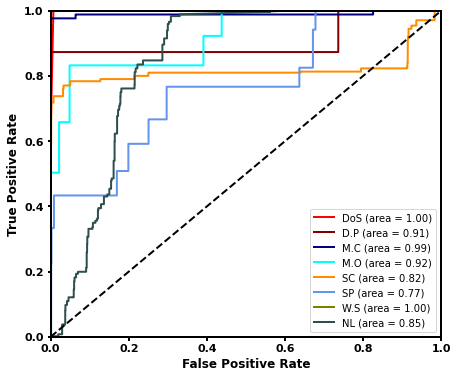

In [105]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_lr[i], tpr_lr[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_lr[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Logistic_Regression")

# SVM

In [106]:
y_score_svc = pipe_svc.decision_function(X_test)

In [107]:
fpr_svc = dict()
tpr_svc = dict()
roc_auc_svc = dict()
for i in range(n_classes):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test[:, i], y_score_svc[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])

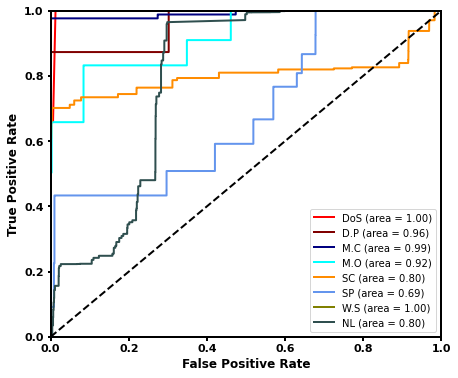

In [108]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_svc[i], tpr_svc[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_svc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_SVM")

# Decision Tree 

In [109]:
y_score_tree = pipe_tree.predict_proba(X_test)
fpr_tree = dict()
tpr_tree = dict()
roc_auc_tree = dict()
for i in range(n_classes):
    fpr_tree[i], tpr_tree[i], _ = roc_curve(y_test[:, i], y_score_tree[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

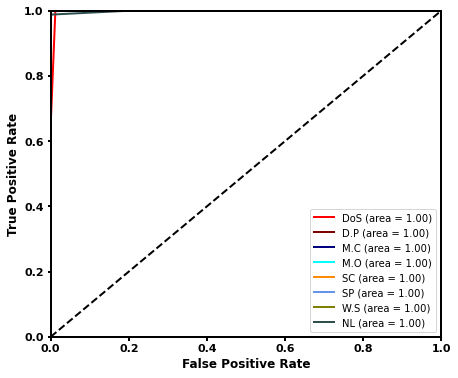

In [110]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_tree[i], tpr_tree[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_tree[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Decision_Tree")

# Random Forest

In [111]:
y_score_rnd = pipe_rnd.predict_proba(X_test)
fpr_rnd = dict()
tpr_rnd = dict()
roc_auc_rnd = dict()
for i in range(n_classes):
    fpr_rnd[i], tpr_rnd[i], _ = roc_curve(y_test[:, i], y_score_rnd[:, i])
    roc_auc_rnd[i] = auc(fpr_rnd[i], tpr_rnd[i])

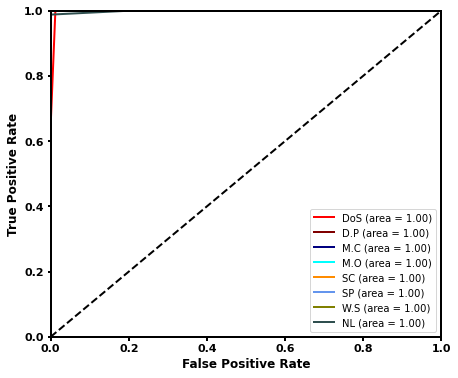

In [112]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rnd[i], tpr_rnd[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_rnd[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Random_Forrest")

# ANN

In [113]:
y_score_mlp = pipe_mlp.predict_proba(X_test)
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test[:, i], y_score_mlp[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

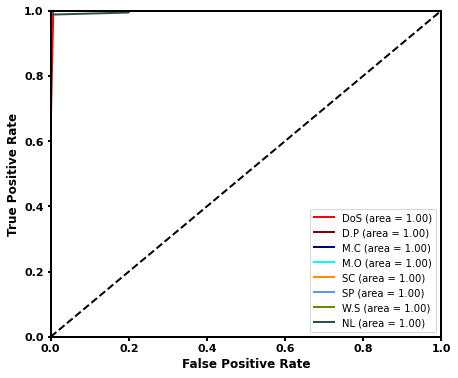

In [114]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_mlp[i], tpr_mlp[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_mlp[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_MLP")